Loading the libraries and Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

df =pd.read_csv('IPL.csv')
df.head()


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


Basic Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [3]:
df.shape

(74, 20)

In [4]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

basic questions

In [5]:
# which team won the most matches?

match_wins =df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match win by team')

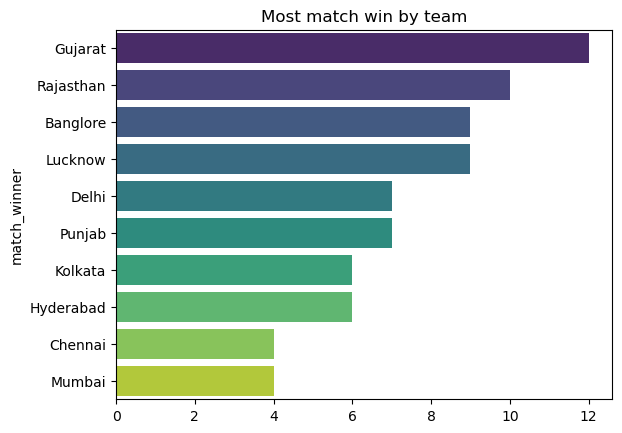

In [6]:
sns.barplot(y=match_wins.index, x= match_wins.values, palette='viridis')
plt.title("Most match win by team")

<Axes: xlabel='toss_decision', ylabel='count'>

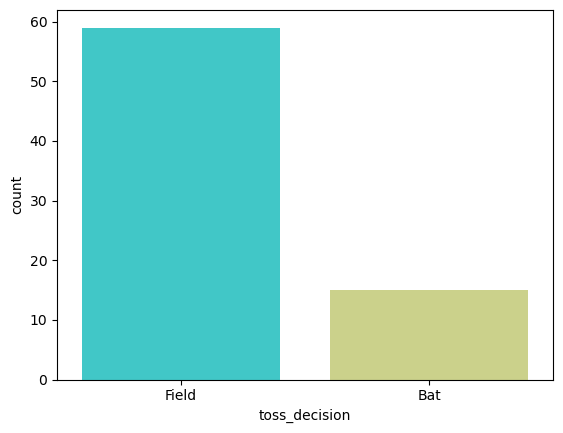

In [7]:
# Toss decision trends
sns.countplot(x=df['toss_decision'],palette='rainbow')

In [8]:
# Toss winner vs Match winner

count =df[df['toss_winner']== df['match_winner']]['match_id'].count()
total_match = df.shape[0]
percentage =(count *100)/total_match
percentage.round(2)

48.65

Text(0.5, 1.0, 'Won by')

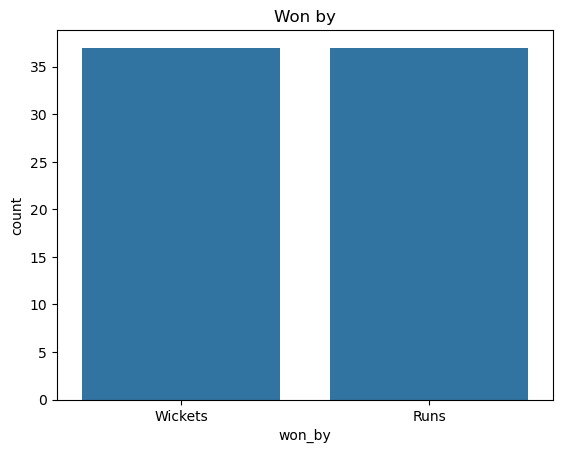

In [9]:
#How do teams win? (Runs vs Wickets)

sns.countplot(x=df['won_by'])
plt.title("Won by")

Key Player Performance

In [10]:
# Most "Player of the Match" Awards
count=df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav      4
Jos Buttler        3
Umesh Yadav        2
Quinton de Kock    2
David Miller       2
Umran Malik        2
K L Rahul          2
Rahul Tripathi     2
Hardik Pandya      2
Jasprit Bumrah     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 1= players with man most man of the match')

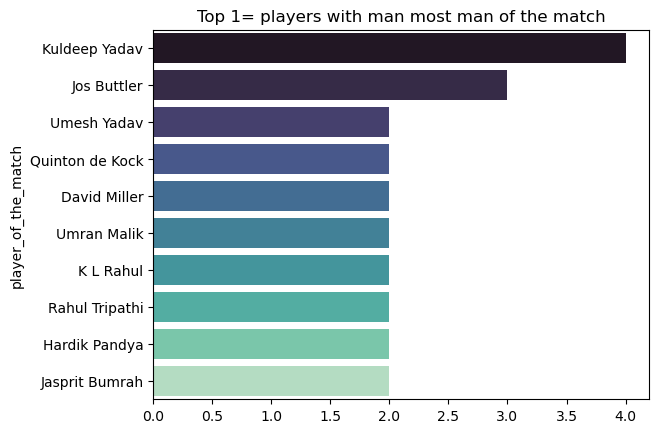

In [11]:
sns.barplot(x=count.values, y=count.index,palette='mako')
plt.title("Top 1= players with man most man of the match")

In [12]:
# top scorers

df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [13]:
century_count = df[df['highscore']>=100][['top_scorer','highscore']].sort_values(by='highscore',ascending=False)
print(century_count)

         top_scorer  highscore
65  Quinton de Kock        140
33      Jos Buttler        116
71    Rajat Patidar        112
72      Jos Buttler        106
25         KL Rahul        103
29      Jos Buttler        103
36         KL Rahul        103
8       Jos Buttler        100


In [15]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

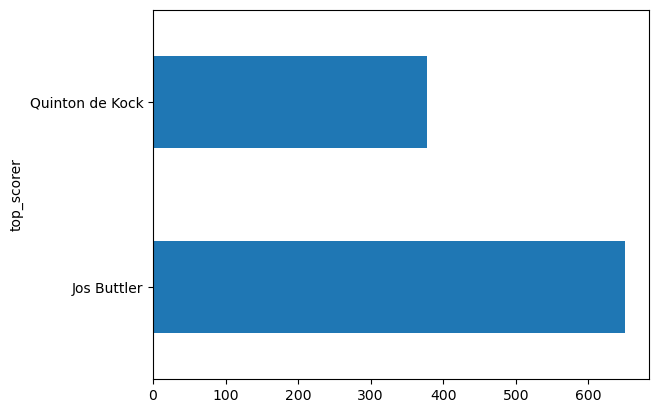

In [16]:
high.plot(kind='barh')

In [17]:
#10 best bowling figure
df.head(
    
)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [18]:
df['highest_wickets']= df['best_bowling_figure'].apply(lambda x:x.split('--')[0])
df['highest_wickets']=df['highest_wickets'].astype(int)


In [20]:
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers

best_bowling
Yuzvendra Chahal     17
Kuldeep Yadav        11
Rashid Khan          11
Jasprit Bumrah       11
Avesh Khan           10
Josh Hazlewood       10
Kagiso Rabada        10
Wanindu Hasaranga     9
Umran Malik           9
T Natarajan           8
Name: highest_wickets, dtype: int32

<Axes: ylabel='best_bowling'>

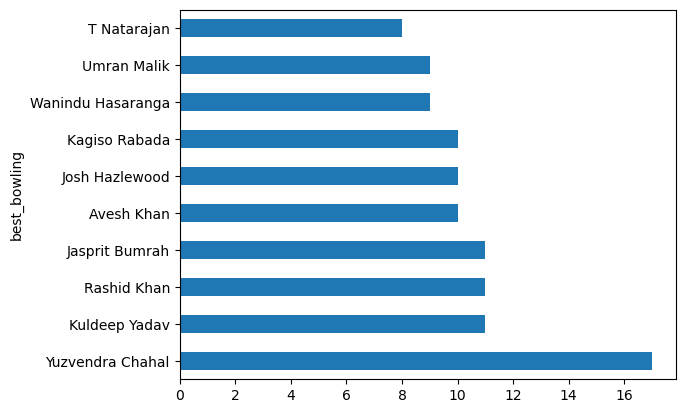

In [21]:
top_bowlers.plot(kind='barh')

In [22]:
#who won the highest margin by run
df[df["won_by"]=="Runs"].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


In [23]:
#which player had the highest individual score
df[df['highscore']==df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [24]:
# Which bowler had the best bowling figures
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
